# **Using the numpy library, implement the Genetic Algorithm for the 8-queens problem. Below a sample board configuration for 8-queens board is given as an example.**

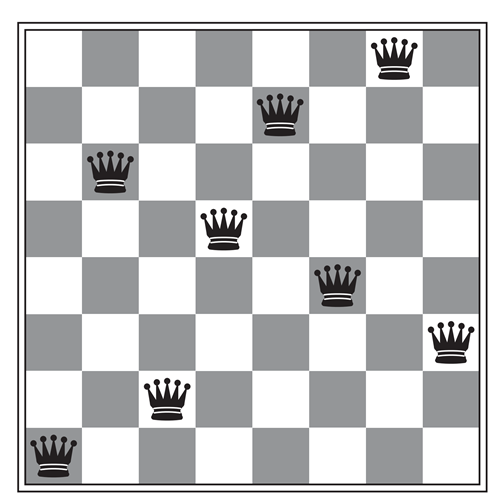

# **As part of the Genetic Algorithm, we have three main components**

# **1.  Gene (A basic unit, which represents one characteristic of the individual.)**
# **2.  Chromosome (A string of Genes, which represents an individual)**
# **3.  Population (A collection of chromosomes)**


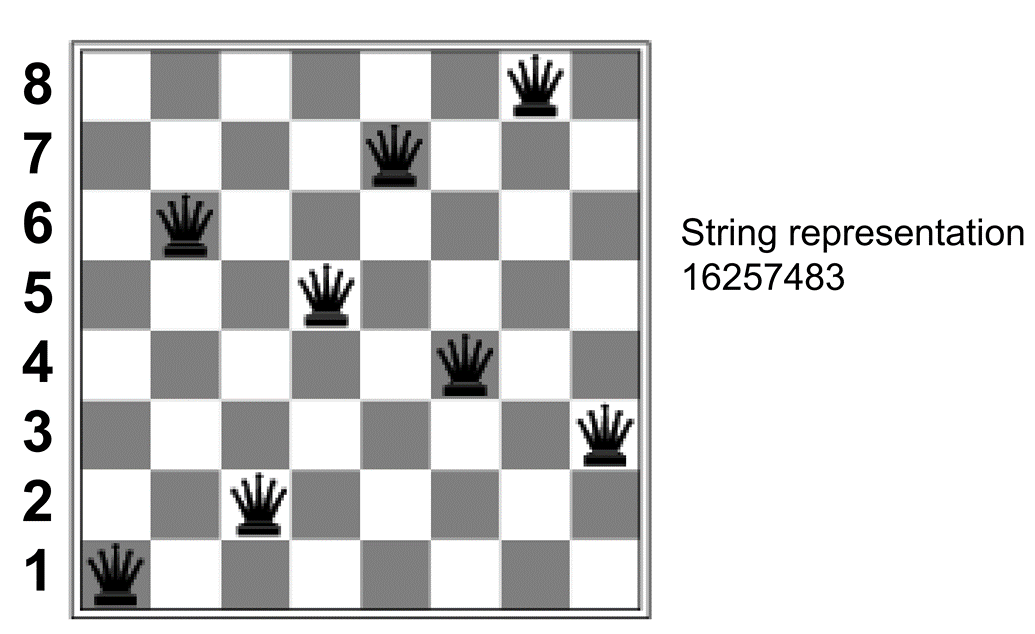

# **The key operators in the Genetic Algorithms are:**

# **1.   Selection**
# **2.   Cross over**
# **3.   Mutation**
# **4.   Fitness**


# **Genetic Algorithm Working**

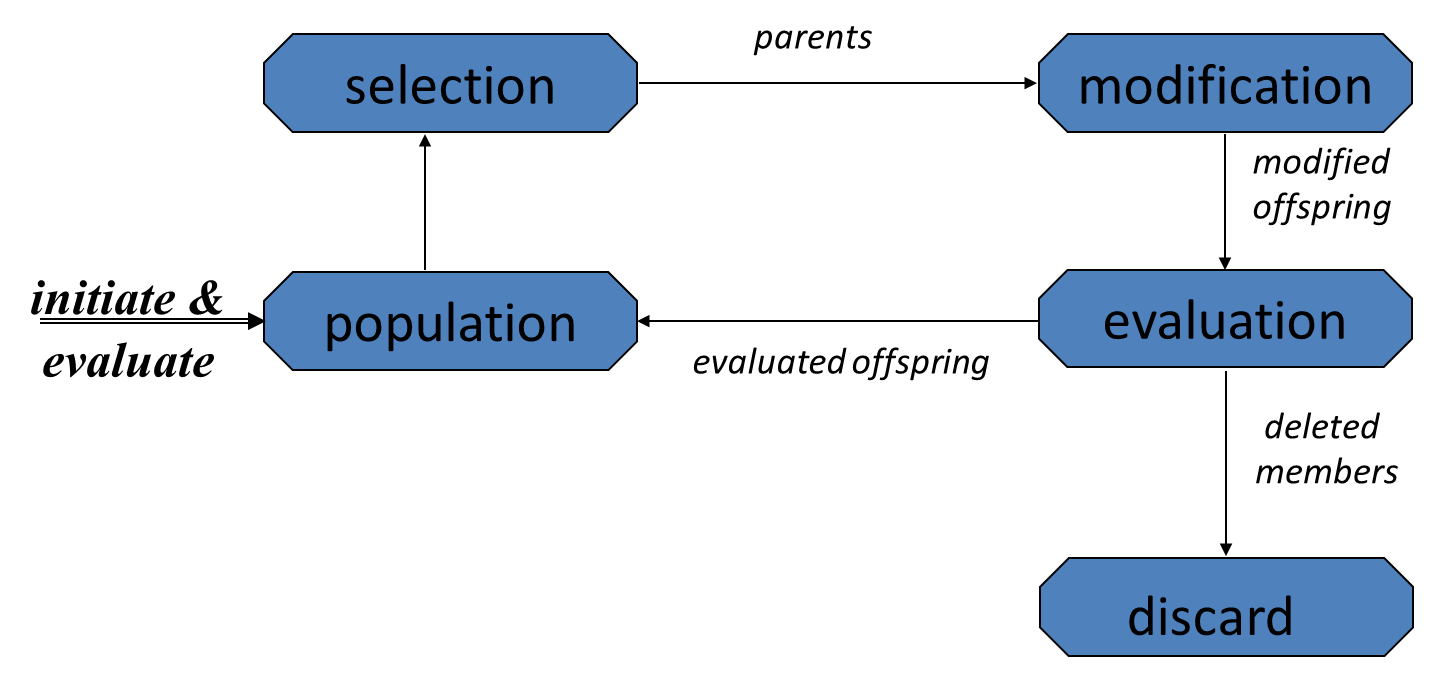

# **The following cell creates random boards (population), generates their chromosomes and calculates their fitness values.**

In [1]:
import numpy as np
import random

def create_8_queens_board():
    queens_board = np.full((8,8), '.')
    print(queens_board)

    # Place queens (represented by 'Q') on the board
    for row in range(0,8):
      col = random.randint(0, 7)
      print(row,col)
      queens_board[row, col] = 'Q'

    return queens_board

def board_chromosome(board):
  queens_positions = np.argwhere(board == 'Q')
  print(queens_positions)
  cols = queens_positions[:, 1] # This will returns columns for all rows in a 2D matrix.
  print(cols)

  return cols


def calculate_fitness_numpy(board):
    # Get the positions of the queens
    queens_positions = np.argwhere(board == 'Q')
    num_queens = len(queens_positions)
    #print(queens_positions)
    #print(num_queens)

    # Extract rows and columns
    rows = queens_positions[:, 0]
    cols = queens_positions[:, 1]

    print(rows)
    print('cols',cols)
    #print(rows-cols)
    #print(rows+cols)

    # Count attacking pairs
    unique_cols, counts = np.unique(cols, return_counts=True)
    print(unique_cols,counts)
    # Apply check to keep only columns that appear exactly once
    unique_only = unique_cols[counts == 1]
    #row_attacks = num_queens - len(np.unique(rows))  # Count rows with multiple queens
    col_attacks = num_queens - len(unique_only)  # Count columns with multiple queens
    print(col_attacks)

    # Total attacking pairs
    total_attacks = col_attacks #+ main_diagonal_attacks
    # Fitness is the number of non-attacking queens
    fitness = num_queens - total_attacks
    return fitness


board1 = create_8_queens_board()
c1=board_chromosome(board1)
fb1=calculate_fitness_numpy(board1)
print(board1)
print('Chromosome',c1)
print('Fitness',fb1)

print('-----------------','\n')

board2 = create_8_queens_board()
c2=board_chromosome(board2)
fb2=calculate_fitness_numpy(board2)
print(board2)
print('Chromosome',c2)
print('Fitness',fb2)

print('-----------------')

board3 = create_8_queens_board()
c3=board_chromosome(board3)
fb3=calculate_fitness_numpy(board3)
print(board3)
print('Chromosome',c3)
print('Fitness',fb3)

print('-----------------')

board4 = create_8_queens_board()
c4=board_chromosome(board4)
fb4=calculate_fitness_numpy(board4)
print(board4)
print('Chromosome',c4)
print('Fitness',fb4)
print('-----------------')


[['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']]
0 0
1 4
2 1
3 1
4 2
5 5
6 5
7 0
[[0 0]
 [1 4]
 [2 1]
 [3 1]
 [4 2]
 [5 5]
 [6 5]
 [7 0]]
[0 4 1 1 2 5 5 0]
[0 1 2 3 4 5 6 7]
cols [0 4 1 1 2 5 5 0]
[0 1 2 4 5] [2 2 1 1 2]
6
[['Q' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' 'Q' '.' '.' '.']
 ['.' 'Q' '.' '.' '.' '.' '.' '.']
 ['.' 'Q' '.' '.' '.' '.' '.' '.']
 ['.' '.' 'Q' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' 'Q' '.' '.']
 ['.' '.' '.' '.' '.' 'Q' '.' '.']
 ['Q' '.' '.' '.' '.' '.' '.' '.']]
Chromosome [0 4 1 1 2 5 5 0]
Fitness 2
----------------- 

[['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' 

# **The following cell uses the boards, chromosomes and fitness values calculated in above cell to perform the selection and crossover operations**

In [2]:
#print(board1)
#print('Chromosome',c1)
#print('Fitness',fb1)

#print(board2)
#print('Chromosome',c2)
#print('Fitness',fb2)

#print(board3)
#print('Chromosome',c3)
#print('Fitness',fb3)

#print(board4)
#print('Chromosome',c4)
#print('Fitness',fb4)

def top_two_chromosomes(boards, chromosomes, fitness_values):
    # Combine fitness with corresponding boards and chromosomes
    combined = list(zip(fitness_values, boards, chromosomes))


    # Sort by fitness (ascending, so the smallest fitness comes first)
    sorted_combined = sorted(combined, key=lambda x: x[0])
    #combined.sort(key=lambda x: x[0])
    print('combined',combined)
    print('sorted_combined',sorted_combined)

    # Extract the top two boards and chromosomes based on fitness
    top_two = sorted_combined[-2:]

    return top_two

# Combine all the boards, chromosomes, and fitness values
boards = [board1, board2, board3, board4]
chromosomes = [c1, c2, c3, c4]
fitness_values = [fb1, fb2, fb3, fb4]

# Get the top two chromosomes and boards
top_two = top_two_chromosomes(boards, chromosomes, fitness_values)
print('top_two')
print(top_two)

parent1 = top_two[-1][2]  # Chromosome of the first top board
parent2 = top_two[-2][2]  # Chromosome of the second top board


def single_point_crossover(parent1, parent2):
    # Randomly choose a crossover point
    #crossover_point = np.random.randint(1, len(parent1) - 1)
    crossover_point=4
    print('crossoverpoint',crossover_point)

    # Create offspring by combining parts of parents at the crossover point
    offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))

    return offspring1, offspring2

# Example parent chromosomes from your 8-queen boards
#parent1 = np.array([2, 5, 3, 6, 2, 6, 2, 7])  # Fitness 3
#parent2 = np.array([2, 4, 5, 3, 3, 1, 7, 0])  # Fitness 3

# Perform single-point crossover
offspring1, offspring2 = single_point_crossover(parent1, parent2)

print("Parent 1:", parent1)
print("Parent 2:", parent2)
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)




combined [(2, array([['Q', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', 'Q', '.', '.', '.'],
       ['.', 'Q', '.', '.', '.', '.', '.', '.'],
       ['.', 'Q', '.', '.', '.', '.', '.', '.'],
       ['.', '.', 'Q', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', 'Q', '.', '.'],
       ['.', '.', '.', '.', '.', 'Q', '.', '.'],
       ['Q', '.', '.', '.', '.', '.', '.', '.']], dtype='<U1'), array([0, 4, 1, 1, 2, 5, 5, 0])), (3, array([['.', '.', '.', '.', '.', '.', '.', 'Q'],
       ['.', '.', '.', '.', '.', 'Q', '.', '.'],
       ['.', '.', '.', '.', '.', '.', 'Q', '.'],
       ['.', '.', '.', '.', '.', '.', '.', 'Q'],
       ['.', '.', '.', '.', '.', 'Q', '.', '.'],
       ['.', '.', '.', '.', 'Q', '.', '.', '.'],
       ['.', '.', '.', 'Q', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', 'Q', '.', '.']], dtype='<U1'), array([7, 5, 6, 7, 5, 4, 3, 5])), (3, array([['.', '.', 'Q', '.', '.', '.', '.', '.'],
       ['.', '.', '.', 'Q', '.', '.', '.', '.']

# **Lab Tasks:**

# **1. Add functionality to detect diagonal conflicts in the board to evaluate board fitness.**

# **2. Add mutation operation in the above code as a separate function similar to the ones added for crossover, fitness and other operations of Genetic Algorithms above. Generate a random number in the range 0 to 7 to decide about which Queen (Gene) to replace in the chromosome with the randomly generated number in the range (0 to 7) representing column number.**

# **3. Restructure the complete code to take the number of boards (population size) from the user as an input and perform all the operations of Genetic Algorithm.**


In [3]:
# Lab Task
import random

# Step 1: Fitness function (diagonal conflict detection)
def fitness(board):
    non_attacking = 28  # Max number of non-attacking pairs (8C2)
    conflicts = 0
    for i in range(len(board)):
        for j in range(i + 1, len(board)):
            if abs(board[i] - board[j]) == abs(i - j):  # Diagonal attack
                conflicts += 1
    return non_attacking - conflicts  # Higher is better

# Step 2: Crossover function
def crossover(parent1, parent2):
    point = random.randint(1, 6)
    child = parent1[:point] + parent2[point:]
    return child

# Step 3: Mutation function
def mutate(board):
    index = random.randint(0, 7)
    new_value = random.randint(0, 7)
    board[index] = new_value
    return board

# Step 4: Generate initial population
def generate_population(size):
    return [[random.randint(0, 7) for _ in range(8)] for _ in range(size)]

# Step 5: Select parents using tournament selection
def select_parents(population):
    tournament = random.sample(population, 5)
    tournament.sort(key=lambda x: fitness(x), reverse=True)
    return tournament[0], tournament[1]

# Step 6: Genetic Algorithm loop
def genetic_algorithm(population_size, generations=1000):
    population = generate_population(population_size)

    for generation in range(generations):
        population.sort(key=lambda x: fitness(x), reverse=True)

        # If perfect solution found
        if fitness(population[0]) == 28:
            print(f"Solution found in generation {generation}")
            return population[0]

        new_population = []

        while len(new_population) < population_size:
            parent1, parent2 = select_parents(population)
            child = crossover(parent1, parent2)

            # Small chance of mutation
            if random.random() < 0.1:
                child = mutate(child)

            new_population.append(child)

        population = new_population

    # If no perfect solution found
    print("No perfect solution found.")
    return population[0]

# Step 7: Main program
if __name__ == "__main__":
    pop_size = int(input("Enter population size: "))
    solution = genetic_algorithm(pop_size)

    print("Best Solution:", solution)
    print("Fitness:", fitness(solution))


Enter population size: 6
Solution found in generation 114
Best Solution: [0, 6, 6, 6, 6, 0, 0, 4]
Fitness: 28
